<a href="https://colab.research.google.com/github/mbenedicto99/artificial_intelligence/blob/master/BENE_IAD006_Exercicio_Pratico_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício Prático 3

Nome do Aluno 1: Marcos de Benedicto

Nome do Aluno 2:

# Exercício: Classificação de Espécies de Flores com XGBoost

Neste exercício, você usará a famosa **base de dados Iris** para treinar e avaliar modelos de **classificação com métodos ensemble, incluindo o XGBoost**.

A base contém 150 amostras de três espécies de flores (*Iris setosa*, *Iris versicolor*, *Iris virginica*), com as seguintes variáveis:

- Comprimento da sépala (`sepal length`)
- Largura da sépala (`sepal width`)
- Comprimento da pétala (`petal length`)
- Largura da pétala (`petal width`)




## Objetivo

Utilizar **métodos ensemble, incluindo o XGBoost** para **prever a espécie da flor** com base em suas características morfológicas.

---

## O que você deve fazer:

OBS: Aproveite o código do exercício da aula anterior!

1. **Importar a base Iris** usando o código fornecido.
2. Separar os dados entre variáveis preditoras (`X`) e alvo (`y`).
3. Dividir os dados em treino e teste (por exemplo, 70%/30%).
4. Utilizar os métodos **XGBoost**, Bagging, Random Forest, AdaBoost e Gradient Boosting com os dados de treino.
5. Avaliar o desempenho dos métodos.


A base e as instruções para importação estão disponíveis em:

https://archive.ics.uci.edu/dataset/53/iris

# Insira o seu código aqui

In [1]:
!pip -q install xgboost

Resumo — Validação Cruzada (treino) e Desempenho no Teste


,Modelo,CV_Acc_Média(±DP),Acc_Teste,F1_macro_Teste
0,AdaBoost,0.933 (± 0.038),0.933333,0.933259
1,GradientBoosting,0.962 (± 0.036),0.933333,0.933259
2,Bagging,0.952 (± 0.043),0.911111,0.910714
3,RandomForest,0.952 (± 0.043),0.911111,0.910714
4,XGBoost,0.952 (± 0.030),0.911111,0.910714



Melhor modelo no teste: AdaBoost

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.875     0.933     0.903        15
   virginica      0.929     0.867     0.897        15

    accuracy                          0.933        45
   macro avg      0.935     0.933     0.933        45
weighted avg      0.935     0.933     0.933        45



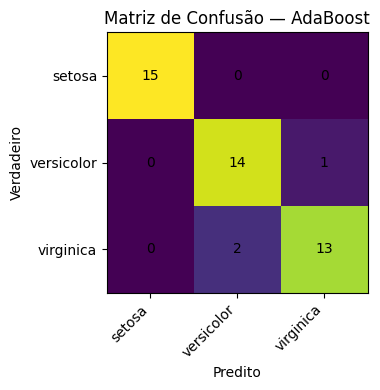

In [9]:
# %% [markdown]
# Exercício Prático 3 – Classificação de espécies (Iris) com ensembles e XGBoost

# %%
# !pip -q install xgboost  # descomente se ainda não tiver xgboost instalado

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# XGBoost
has_xgb = True

iris = load_iris(as_frame=True)
X = iris.data.copy()
y = iris.target.copy()
classes = iris.target_names


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


models = {
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=200, learning_rate=0.5, random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    ),
}

if has_xgb:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        objective="multi:softprob",
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1
    )


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
reports = {}
conf_mats = {}

for name, clf in models.items():

    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)


    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    rep = classification_report(y_test, y_pred, target_names=classes, digits=3)
    cm = confusion_matrix(y_test, y_pred)

    rows.append({
        "Modelo": name,
        "CV_Acc_Média(±DP)": f"{cv_scores.mean():.3f} (± {cv_scores.std():.3f})",
        "Acc_Teste": acc,
        "F1_macro_Teste": f1m,
    })
    reports[name] = rep
    conf_mats[name] = cm

results = pd.DataFrame(rows).sort_values(by="Acc_Teste", ascending=False).reset_index(drop=True)
print("Resumo — Validação Cruzada (treino) e Desempenho no Teste")
display(results)


best_name = results.iloc[0]["Modelo"]
print(f"\nMelhor modelo no teste: {best_name}\n")
print(reports[best_name])


fig, ax = plt.subplots(figsize=(4.5, 4))
cm = conf_mats[best_name]
im = ax.imshow(cm, interpolation="nearest")
ax.set_title(f"Matriz de Confusão — {best_name}")
ax.set_xlabel("Predito"); ax.set_ylabel("Verdadeiro")
ax.set_xticks(range(len(classes))); ax.set_xticklabels(classes, rotation=45, ha="right")
ax.set_yticks(range(len(classes))); ax.set_yticklabels(classes)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()